# Customer Churn Prediction 2020
### Predict whether a customer will change telco provider

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("churn.csv")
df.head(2)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no


## Data Wrangling

In [3]:
df.isnull().sum()  # No-null values found

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [4]:
df["area_code"] =df["area_code"].map(lambda x: x[10:])

In [5]:
df.head(2)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no


In [6]:
def convert(x):
    if x=="yes":
        return 1
    else:
        return 0

#converts yes/no to 1/0

In [7]:
df["international_plan"]=df["international_plan"].apply(convert)

In [8]:
df["voice_mail_plan"]=df["voice_mail_plan"].apply(convert)

In [9]:
df["churn"]=df["churn"].apply(convert)

In [10]:
df.groupby("churn").mean()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
churn,,,,,,,,,,,,,,,,,
0,99.924973,0.062705,0.282037,8.177437,175.555093,99.813801,29.844948,198.570674,100.231380,16.878743,199.577519,99.942771,8.981131,10.194441,4.460570,2.753018,1.441676
1,102.137124,0.279264,0.137124,4.299331,208.990134,100.478261,35.528679,209.964883,99.841137,17.847207,206.331773,99.209030,9.285033,10.632441,4.217391,2.871254,2.275920


In [11]:
df["state"].unique()

array(['OH', 'NJ', 'OK', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI', 'IA', 'MT',
       'NY', 'ID', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC', 'WY', 'HI', 'NH',
       'AK', 'GA', 'MD', 'AR', 'WI', 'OR', 'MI', 'DE', 'UT', 'CA', 'SD',
       'NC', 'WA', 'MN', 'NM', 'NV', 'DC', 'VT', 'KY', 'ME', 'MS', 'AL',
       'NE', 'KS', 'TN', 'IL', 'PA', 'CT', 'ND'], dtype=object)

In [12]:
X=df.drop(["state","churn"],axis=1)
y=df["churn"]

In [13]:
state_dummies=pd.get_dummies(df["state"]).drop("WY",axis=1)

In [14]:
X=pd.concat([state_dummies,X],axis=1)

In [15]:
X.head(3)

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,0,0,0,0,0,0,0,0,0,0,...,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
1,0,0,0,0,0,0,0,0,0,0,...,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
2,0,0,0,0,0,0,0,0,0,0,...,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2


## Data Analysis and Visualisation

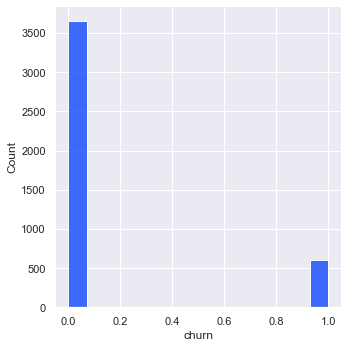

In [16]:
#Binning
sns.set_theme(palette="bright")
sns.displot(df["churn"])
plt.show()

In [17]:
#Table of proportions
intl_churn=pd.crosstab(df["international_plan"],df["churn"],margins=True)
intl_churn

churn,0,1,All
international_plan,,,
0,3423,431,3854
1,229,167,396
All,3652,598,4250


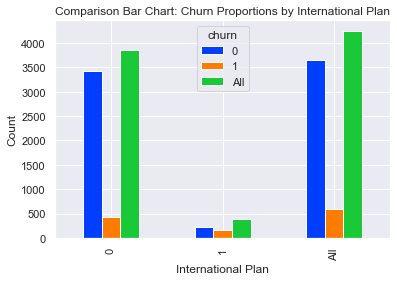

In [18]:
#Clustered Bar Graph;churn by international plan
intl_churn.plot(kind='bar',legend=True,title='Comparison Bar Chart: Churn Proportions by International Plan')
plt.xlabel('International Plan')
plt.ylabel('Count')
plt.show()

In [19]:
#Table of proportions
vmailplan_churn=pd.crosstab(df["voice_mail_plan"],df["churn"],margins=True)
vmailplan_churn

churn,0,1,All
voice_mail_plan,,,
0,2622,516,3138
1,1030,82,1112
All,3652,598,4250


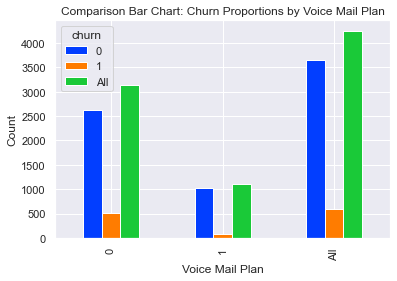

In [20]:
#Clustered Bar Graph;churn by vmail plan
vmailplan_churn.plot(kind='bar',legend=True,title='Comparison Bar Chart: Churn Proportions by Voice Mail Plan')
plt.ylabel('Count')
plt.xlabel('Voice Mail Plan')
plt.show()

In [21]:
#Table of proportions
cust_service_calls_churn=pd.crosstab(df["number_customer_service_calls"],df["churn"],margins=True)
cust_service_calls_churn

churn,0,1,All
number_customer_service_calls,,,
0,789,97,886
1,1358,166,1524
2,845,102,947
3,495,63,558
4,117,92,209
5,32,49,81
6,9,19,28
7,6,7,13
8,1,1,2


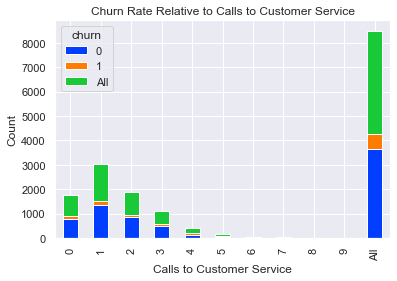

In [22]:
#Stacked Bar of Customer Service Calls and Churn
cust_service_calls_churn.plot(kind='bar',stacked=True)
plt.xlabel('Calls to Customer Service')
plt.ylabel('Count')
plt.title('Churn Rate Relative to Calls to Customer Service')
plt.show()

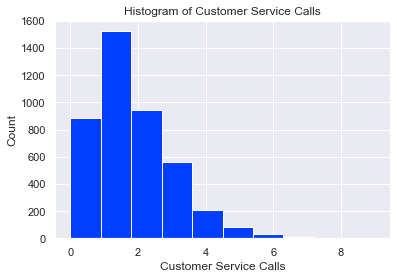

In [23]:
#Histogram of Customer Service Calls
plt.hist(df['number_customer_service_calls'])
plt.title('Histogram of Customer Service Calls')
plt.xlabel('Customer Service Calls')
plt.ylabel('Count')
plt.show()

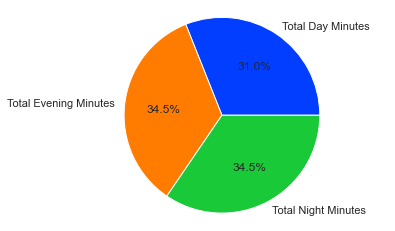

In [24]:
#Pie Chart of Total Day,Evening and Night Minutes
minutes = ['Total Day Minutes','Total Evening Minutes','Total Night Minutes']
total_minutes = [df['total_day_minutes'].sum(),df['total_eve_minutes'].sum(),df['total_night_minutes'].sum()]
ax = plt.subplot()
ax.pie(total_minutes,labels=minutes, autopct='%1.1f%%')
ax.axis('equal')
plt.show()

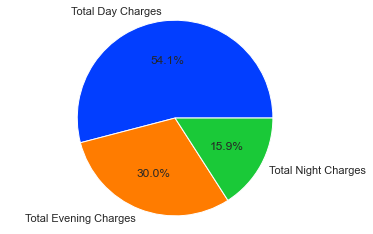

In [25]:
#Pie Chart of Total Day,Evening and Night Charges
charges = ['Total Day Charges','Total Evening Charges','Total Night Charges']
total_charges = [df['total_day_charge'].sum(),df['total_eve_charge'].sum(),df['total_night_charge'].sum()]
ax1 = plt.subplot()
ax1.pie(total_charges,labels=charges, autopct='%1.1f%%')
ax1.axis('equal')
plt.show()

In [26]:
#Range of Number of Voice Mail Messages
Number_of_vmail_messages=[len(df[(df['number_vmail_messages']>0) & (df['number_vmail_messages']<10)]),len(df[(df['number_vmail_messages']>=10) & (df['number_vmail_messages']<20)]),len(df[(df['number_vmail_messages']>=20) & (df['number_vmail_messages']<30)]),len(df[(df['number_vmail_messages']>=30) & (df['number_vmail_messages']<40)]), len(df[(df['number_vmail_messages']>=40)])]
Number_of_vmail_messages

[5, 110, 467, 421, 108]

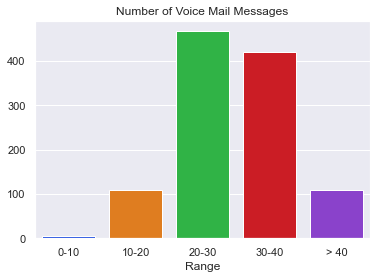

In [27]:
#Plot between Range and Number of Vmail Messages
range_vmail_messages = ['0-10','10-20','20-30','30-40','> 40']
plot_vmail_messages=sns.barplot(x=range_vmail_messages,y=Number_of_vmail_messages)
plot_vmail_messages.set(title="Number of Voice Mail Messages",xlabel="Range")
plt.show()

### Outlier Detection using Percentile-method

In [28]:
df.shape

(4250, 20)

In [29]:
df.describe()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,0.093176,0.261647,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059,0.140706
std,39.698401,0.290714,0.439583,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434,0.347759
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,0.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000,0.000000
50%,100.000000,0.000000,0.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,0.000000,1.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000,0.000000
max,243.000000,1.000000,1.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [30]:
min_thresold,max_thresold=df.number_customer_service_calls.quantile([0.001,0.999])
print(min_thresold,max_thresold)
df[(df.number_customer_service_calls < min_thresold) & (df.number_customer_service_calls > max_thresold)]

0.0 7.0


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn


In [31]:
min_thresold,max_thresold=df.total_intl_charge.quantile([0.001,0.999])
print(min_thresold,max_thresold)
df[(df.total_intl_charge < min_thresold) & (df.total_intl_charge > max_thresold)]

0.0 5.160080000000016


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn


In [32]:
min_thresold,max_thresold=df.total_night_charge.quantile([0.001,0.999])
print(min_thresold,max_thresold)
df[(df.total_night_charge < min_thresold) & (df.total_night_charge > max_thresold)]

2.10747 16.517630000000025


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn


In [33]:
min_thresold,max_thresold=df.total_eve_charge.quantile([0.001,0.999])
print(min_thresold,max_thresold)
df[(df.total_eve_charge < min_thresold) & (df.total_eve_charge > max_thresold)]

3.59498 29.59510000000002


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn


In [34]:
min_thresold,max_thresold=df.total_day_charge.quantile([0.001,0.999])
print(min_thresold,max_thresold)
df[(df.total_day_charge < min_thresold) & (df.total_day_charge > max_thresold)]

1.24739 57.28032000000007


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn


In [35]:
#No Outliers were found.

## Model Training
**Random Forest Classifier**

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [37]:
X_scaled=MinMaxScaler().fit_transform(X)    #Scaling the data

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [39]:
model=RandomForestClassifier(n_estimators=400)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9529411764705882

In [40]:
y_pred=model.predict(X_test)   #predictions

**Accuracy-Report**

In [41]:
print(confusion_matrix(y_test,y_pred),"\n\n")
print(classification_report(y_test,y_pred))

[[1075    5]
 [  55  140]] 


              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1080
           1       0.97      0.72      0.82       195

    accuracy                           0.95      1275
   macro avg       0.96      0.86      0.90      1275
weighted avg       0.95      0.95      0.95      1275



### Got accuracy score of 95%

## Artificial Neural Network - Deep Learning

In [42]:
import tensorflow as tf
from tensorflow import keras

In [43]:
X_train.shape  #68 columns, I'll take same number of neurons in the input layer
# Each neuron in the input layer is accepting 1 feature

(2975, 68)

In [44]:
# X or y must not have any object(or string) type

In [61]:
model=keras.Sequential([
    keras.layers.Dense(68,input_shape=(68,),activation="relu"),  #hidden layer
    keras.layers.Dense(1,activation="sigmoid"),    #output layer

])

model.compile(optimizer="adam", 
             loss="binary_crossentropy",
             metrics=["accuracy"])

model.fit(X_train,y_train,epochs=500)

Epoch 1/500
93/93 [==============================] - 0s 1ms/step - loss: 0.4399 - accuracy: 0.8316
Epoch 2/500
93/93 [==============================] - 0s 1ms/step - loss: 0.3773 - accuracy: 0.8645
Epoch 3/500
93/93 [==============================] - 0s 1ms/step - loss: 0.3601 - accuracy: 0.8645
Epoch 4/500
93/93 [==============================] - 0s 1ms/step - loss: 0.3466 - accuracy: 0.8669
Epoch 5/500
93/93 [==============================] - 0s 1ms/step - loss: 0.3382 - accuracy: 0.8696
Epoch 6/500
93/93 [==============================] - 0s 1ms/step - loss: 0.3290 - accuracy: 0.8682
Epoch 7/500
93/93 [==============================] - 0s 1ms/step - loss: 0.3217 - accuracy: 0.8709
Epoch 8/500
93/93 [==============================] - 0s 1ms/step - loss: 0.3167 - accuracy: 0.8716
Epoch 9/500
93/93 [==============================] - 0s 1ms/step - loss: 0.3123 - accuracy: 0.8739
Epoch 10/500
93/93 [==============================] - 0s 1ms/step - loss: 0.3074 - accuracy: 0.8739
Epoch 11/

93/93 [==============================] - 0s 1ms/step - loss: 0.1372 - accuracy: 0.9583
Epoch 84/500
93/93 [==============================] - 0s 1ms/step - loss: 0.1375 - accuracy: 0.9613
Epoch 85/500
93/93 [==============================] - 0s 1ms/step - loss: 0.1367 - accuracy: 0.9583
Epoch 86/500
93/93 [==============================] - 0s 1ms/step - loss: 0.1343 - accuracy: 0.9607
Epoch 87/500
93/93 [==============================] - 0s 1ms/step - loss: 0.1342 - accuracy: 0.9610
Epoch 88/500
93/93 [==============================] - 0s 1ms/step - loss: 0.1337 - accuracy: 0.9617
Epoch 89/500
93/93 [==============================] - 0s 1ms/step - loss: 0.1313 - accuracy: 0.9620
Epoch 90/500
93/93 [==============================] - 0s 1ms/step - loss: 0.1313 - accuracy: 0.9600
Epoch 91/500
93/93 [==============================] - 0s 1ms/step - loss: 0.1323 - accuracy: 0.9610
Epoch 92/500
93/93 [==============================] - 0s 1ms/step - loss: 0.1306 - accuracy: 0.9624
Epoch 93/500


93/93 [==============================] - 0s 3ms/step - loss: 0.0888 - accuracy: 0.9771
Epoch 165/500
93/93 [==============================] - 0s 2ms/step - loss: 0.0877 - accuracy: 0.9751
Epoch 166/500
93/93 [==============================] - 0s 2ms/step - loss: 0.0867 - accuracy: 0.9775
Epoch 167/500
93/93 [==============================] - 0s 1ms/step - loss: 0.0877 - accuracy: 0.9758
Epoch 168/500
93/93 [==============================] - 0s 1ms/step - loss: 0.0879 - accuracy: 0.9768
Epoch 169/500
93/93 [==============================] - 0s 1ms/step - loss: 0.0851 - accuracy: 0.9792
Epoch 170/500
93/93 [==============================] - 0s 1ms/step - loss: 0.0859 - accuracy: 0.9782
Epoch 171/500
93/93 [==============================] - 0s 1ms/step - loss: 0.0877 - accuracy: 0.9741
Epoch 172/500
93/93 [==============================] - 0s 1ms/step - loss: 0.0845 - accuracy: 0.9775
Epoch 173/500
93/93 [==============================] - 0s 2ms/step - loss: 0.0856 - accuracy: 0.9778
Epoc

93/93 [==============================] - 0s 2ms/step - loss: 0.0596 - accuracy: 0.9842
Epoch 245/500
93/93 [==============================] - 0s 1ms/step - loss: 0.0587 - accuracy: 0.9855
Epoch 246/500
93/93 [==============================] - 0s 4ms/step - loss: 0.0604 - accuracy: 0.9859
Epoch 247/500
93/93 [==============================] - 0s 5ms/step - loss: 0.0571 - accuracy: 0.9869
Epoch 248/500
93/93 [==============================] - 0s 2ms/step - loss: 0.0589 - accuracy: 0.9859
Epoch 249/500
93/93 [==============================] - 0s 1ms/step - loss: 0.0572 - accuracy: 0.9866
Epoch 250/500
93/93 [==============================] - 0s 1ms/step - loss: 0.0562 - accuracy: 0.9869
Epoch 251/500
93/93 [==============================] - 0s 1ms/step - loss: 0.0593 - accuracy: 0.9855
Epoch 252/500
93/93 [==============================] - 0s 1ms/step - loss: 0.0561 - accuracy: 0.9849
Epoch 253/500
93/93 [==============================] - 0s 1ms/step - loss: 0.0572 - accuracy: 0.9852
Epoc

93/93 [==============================] - 0s 1ms/step - loss: 0.0374 - accuracy: 0.9923
Epoch 326/500
93/93 [==============================] - 0s 1ms/step - loss: 0.0376 - accuracy: 0.9906
Epoch 327/500
93/93 [==============================] - 0s 1ms/step - loss: 0.0373 - accuracy: 0.9929
Epoch 328/500
93/93 [==============================] - 0s 1ms/step - loss: 0.0365 - accuracy: 0.9916
Epoch 329/500
93/93 [==============================] - 0s 1ms/step - loss: 0.0368 - accuracy: 0.9913
Epoch 330/500
93/93 [==============================] - 0s 1ms/step - loss: 0.0382 - accuracy: 0.9913
Epoch 331/500
93/93 [==============================] - 0s 1ms/step - loss: 0.0372 - accuracy: 0.9926
Epoch 332/500
93/93 [==============================] - 0s 1ms/step - loss: 0.0369 - accuracy: 0.9919
Epoch 333/500
93/93 [==============================] - 0s 1ms/step - loss: 0.0368 - accuracy: 0.9923
Epoch 334/500
93/93 [==============================] - 0s 1ms/step - loss: 0.0370 - accuracy: 0.9919
Epoc

93/93 [==============================] - 0s 1ms/step - loss: 0.0249 - accuracy: 0.9943
Epoch 407/500
93/93 [==============================] - 0s 1ms/step - loss: 0.0251 - accuracy: 0.9960
Epoch 408/500
93/93 [==============================] - 0s 1ms/step - loss: 0.0258 - accuracy: 0.9936
Epoch 409/500
93/93 [==============================] - 0s 1ms/step - loss: 0.0238 - accuracy: 0.9966
Epoch 410/500
93/93 [==============================] - 0s 1ms/step - loss: 0.0252 - accuracy: 0.9946
Epoch 411/500
93/93 [==============================] - 0s 1ms/step - loss: 0.0232 - accuracy: 0.9956
Epoch 412/500
93/93 [==============================] - 0s 1ms/step - loss: 0.0266 - accuracy: 0.9953
Epoch 413/500
93/93 [==============================] - 0s 1ms/step - loss: 0.0237 - accuracy: 0.9953
Epoch 414/500
93/93 [==============================] - 0s 1ms/step - loss: 0.0232 - accuracy: 0.9966
Epoch 415/500
93/93 [==============================] - 0s 1ms/step - loss: 0.0232 - accuracy: 0.9963
Epoc

93/93 [==============================] - 0s 2ms/step - loss: 0.0169 - accuracy: 0.9966
Epoch 488/500
93/93 [==============================] - 0s 2ms/step - loss: 0.0171 - accuracy: 0.9976
Epoch 489/500
93/93 [==============================] - 0s 2ms/step - loss: 0.0159 - accuracy: 0.9980
Epoch 490/500
93/93 [==============================] - 0s 2ms/step - loss: 0.0155 - accuracy: 0.9973
Epoch 491/500
93/93 [==============================] - 0s 2ms/step - loss: 0.0156 - accuracy: 0.9976
Epoch 492/500
93/93 [==============================] - 0s 2ms/step - loss: 0.0181 - accuracy: 0.9970
Epoch 493/500
93/93 [==============================] - 0s 2ms/step - loss: 0.0159 - accuracy: 0.9970
Epoch 494/500
93/93 [==============================] - 0s 2ms/step - loss: 0.0146 - accuracy: 0.9987
Epoch 495/500
93/93 [==============================] - 0s 2ms/step - loss: 0.0156 - accuracy: 0.9970
Epoch 496/500
93/93 [==============================] - 0s 2ms/step - loss: 0.0155 - accuracy: 0.9976
Epoc

Its better to use log-loss when its a classification problem(ex. 0/1,1-5) as log-loss penalizes accurately unlike MSE which penalizes really less for wrong prediction 

In [62]:
model.evaluate(X_test,y_test)

40/40 [==============================] - 0s 1ms/step - loss: 0.7968 - accuracy: 0.8776


[0.7968196868896484, 0.8776470422744751]

In [69]:
model.predict(X_test)[:5]

array([[8.8359416e-03],
       [3.6878882e-05],
       [1.5531796e-05],
       [9.2856717e-06],
       [3.0090598e-05]], dtype=float32)

In [70]:
# alt. way
y_pred2=[]
def classify(predictions):
    for e in predictions:
        if e>0.5:
            y_pred2.append(1)
        else:
            y_pred2.append(0)

In [71]:
predictions=model.predict(X_test)
classify(predictions)
y_pred2[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [72]:
y_pred1=model.predict_classes(X_test)
y_pred1

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

In [80]:
print(confusion_matrix(y_test,y_pred1),"\n\n")
print(classification_report(y_test,y_pred1))

[[1019   61]
 [  95  100]] 


              precision    recall  f1-score   support

           0       0.91      0.94      0.93      1080
           1       0.62      0.51      0.56       195

    accuracy                           0.88      1275
   macro avg       0.77      0.73      0.75      1275
weighted avg       0.87      0.88      0.87      1275



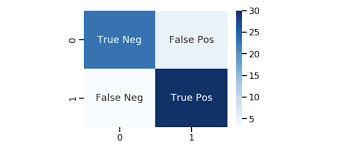

Text(66.5, 0.5, 'Truth')

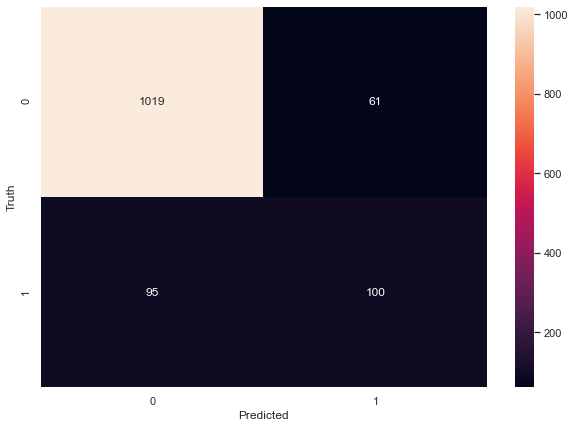

In [84]:
#Visual representation of Confusion Matrix
import seaborn as sns
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred1)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Accuracy is ratio of correct predictions to all the predictions**

In [76]:
accuracy = (1019+100)/(1019+61+95+100)
accuracy

0.8776470588235294

**Precision is ratio of correct 0 class predictions to all the 0 class prediction** Depends upon Predictions

In [98]:
precision0= 1019/(1019+95)
precision0

0.914721723518851

**Precision is ratio of correct 1 class predictions to all the 1 class prediction**



In [99]:
precision1=100/(100+61)
precision1

0.6211180124223602

**Recall is ratio of correct 0 class truth to all the 0 class truth**  Depends upon Truth

In [100]:
recall0=1019/(1019+61)
recall0

0.9435185185185185

**Recall is ratio of correct 1 class truth to all the 1 class truth**

In [101]:
recall1=100/(100+95)
recall1

0.5128205128205128

**f1 score: Harmonic mean of precision and recall**

**f1 = 2 * (precision * recall) / (precision + recall)**

In [104]:
# class:0
2*(precision0*recall0)/(precision0+recall0)

0.9288969917958066

In [105]:
# class:1
2*(precision1*recall1)/(precision1+recall1)

0.5617977528089887